# Business Case: Yulu - Hypothesis Testing

# About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


# Business problem
The company wants to know:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands


# Column Profiling:
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
   - 1: Clear, Few clouds, partly cloudy, partly cloudy
   - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered


# Problem Statement
- Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset
- Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
- Select an appropriate test to check whether:
    - Working Day has effect on number of electric cycles rented
    - No. of cycles rented similar or different in different seasons
    - No. of cycles rented similar or different in different weather
    - Weather is dependent on season (check between 2 predictor variable)
- Set up Null Hypothesis (H0)
- State the alternate hypothesis (H1)
- Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)
    - Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary
- Set a significance level (alpha)
- Calculate test Statistics.
- Decision to accept or reject null hypothesis.
- Inference from the analysis


In [1]:
#importing libraries for our purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.stats import norm

In [2]:
df=pd.read_csv('bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
#No of Rows and columns in data
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 10886
Number of columns: 12


In [4]:
#checking datatypes
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
#Description of data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
#Description of data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
casual,10886.0,NaN,NaN,NaN,36.021955,49.960477,0.0,4.0,17.0,49.0,367.0


In [8]:
#Description of categorical values in data
df.describe(include='O').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


In [9]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [10]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].unique())

datetime : ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
season : [1 2 3 4]
holiday : [0 1]
workingday : [0 1]
weather : [1 2 3 4]
temp : [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
atemp : [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
humidity : [ 81  80  75  86  76  77 

## Value counts

In [12]:
for i in df.columns:
 print(i,':',df[i].value_counts())

datetime : 2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
season : 4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
holiday : 0    10575
1      311
Name: holiday, dtype: int64
workingday : 1    7412
0    3474
Name: workingday, dtype: int64
weather : 1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
temp : 14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68   

In [13]:
#columns in data
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [14]:
#Shape of data
df.shape

(10886, 12)

In [15]:
# Checking for duplicates
df.duplicated().value_counts()

False    10886
dtype: int64

In [16]:
#checking null values in every column of our data
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [17]:
df['datetime']=pd.to_datetime(df['datetime'])

In [18]:
#checking datatypes
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

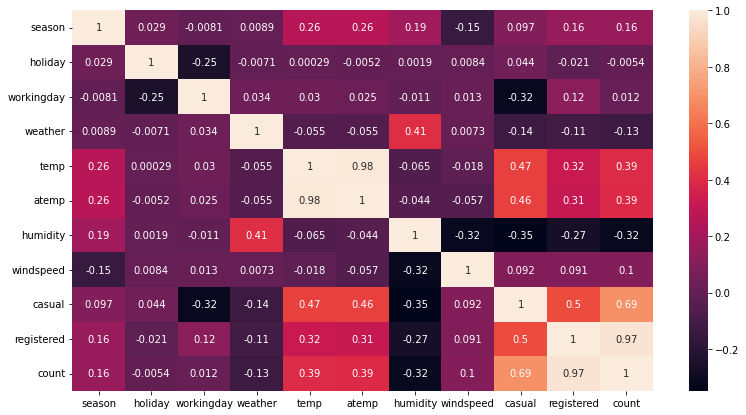

In [19]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

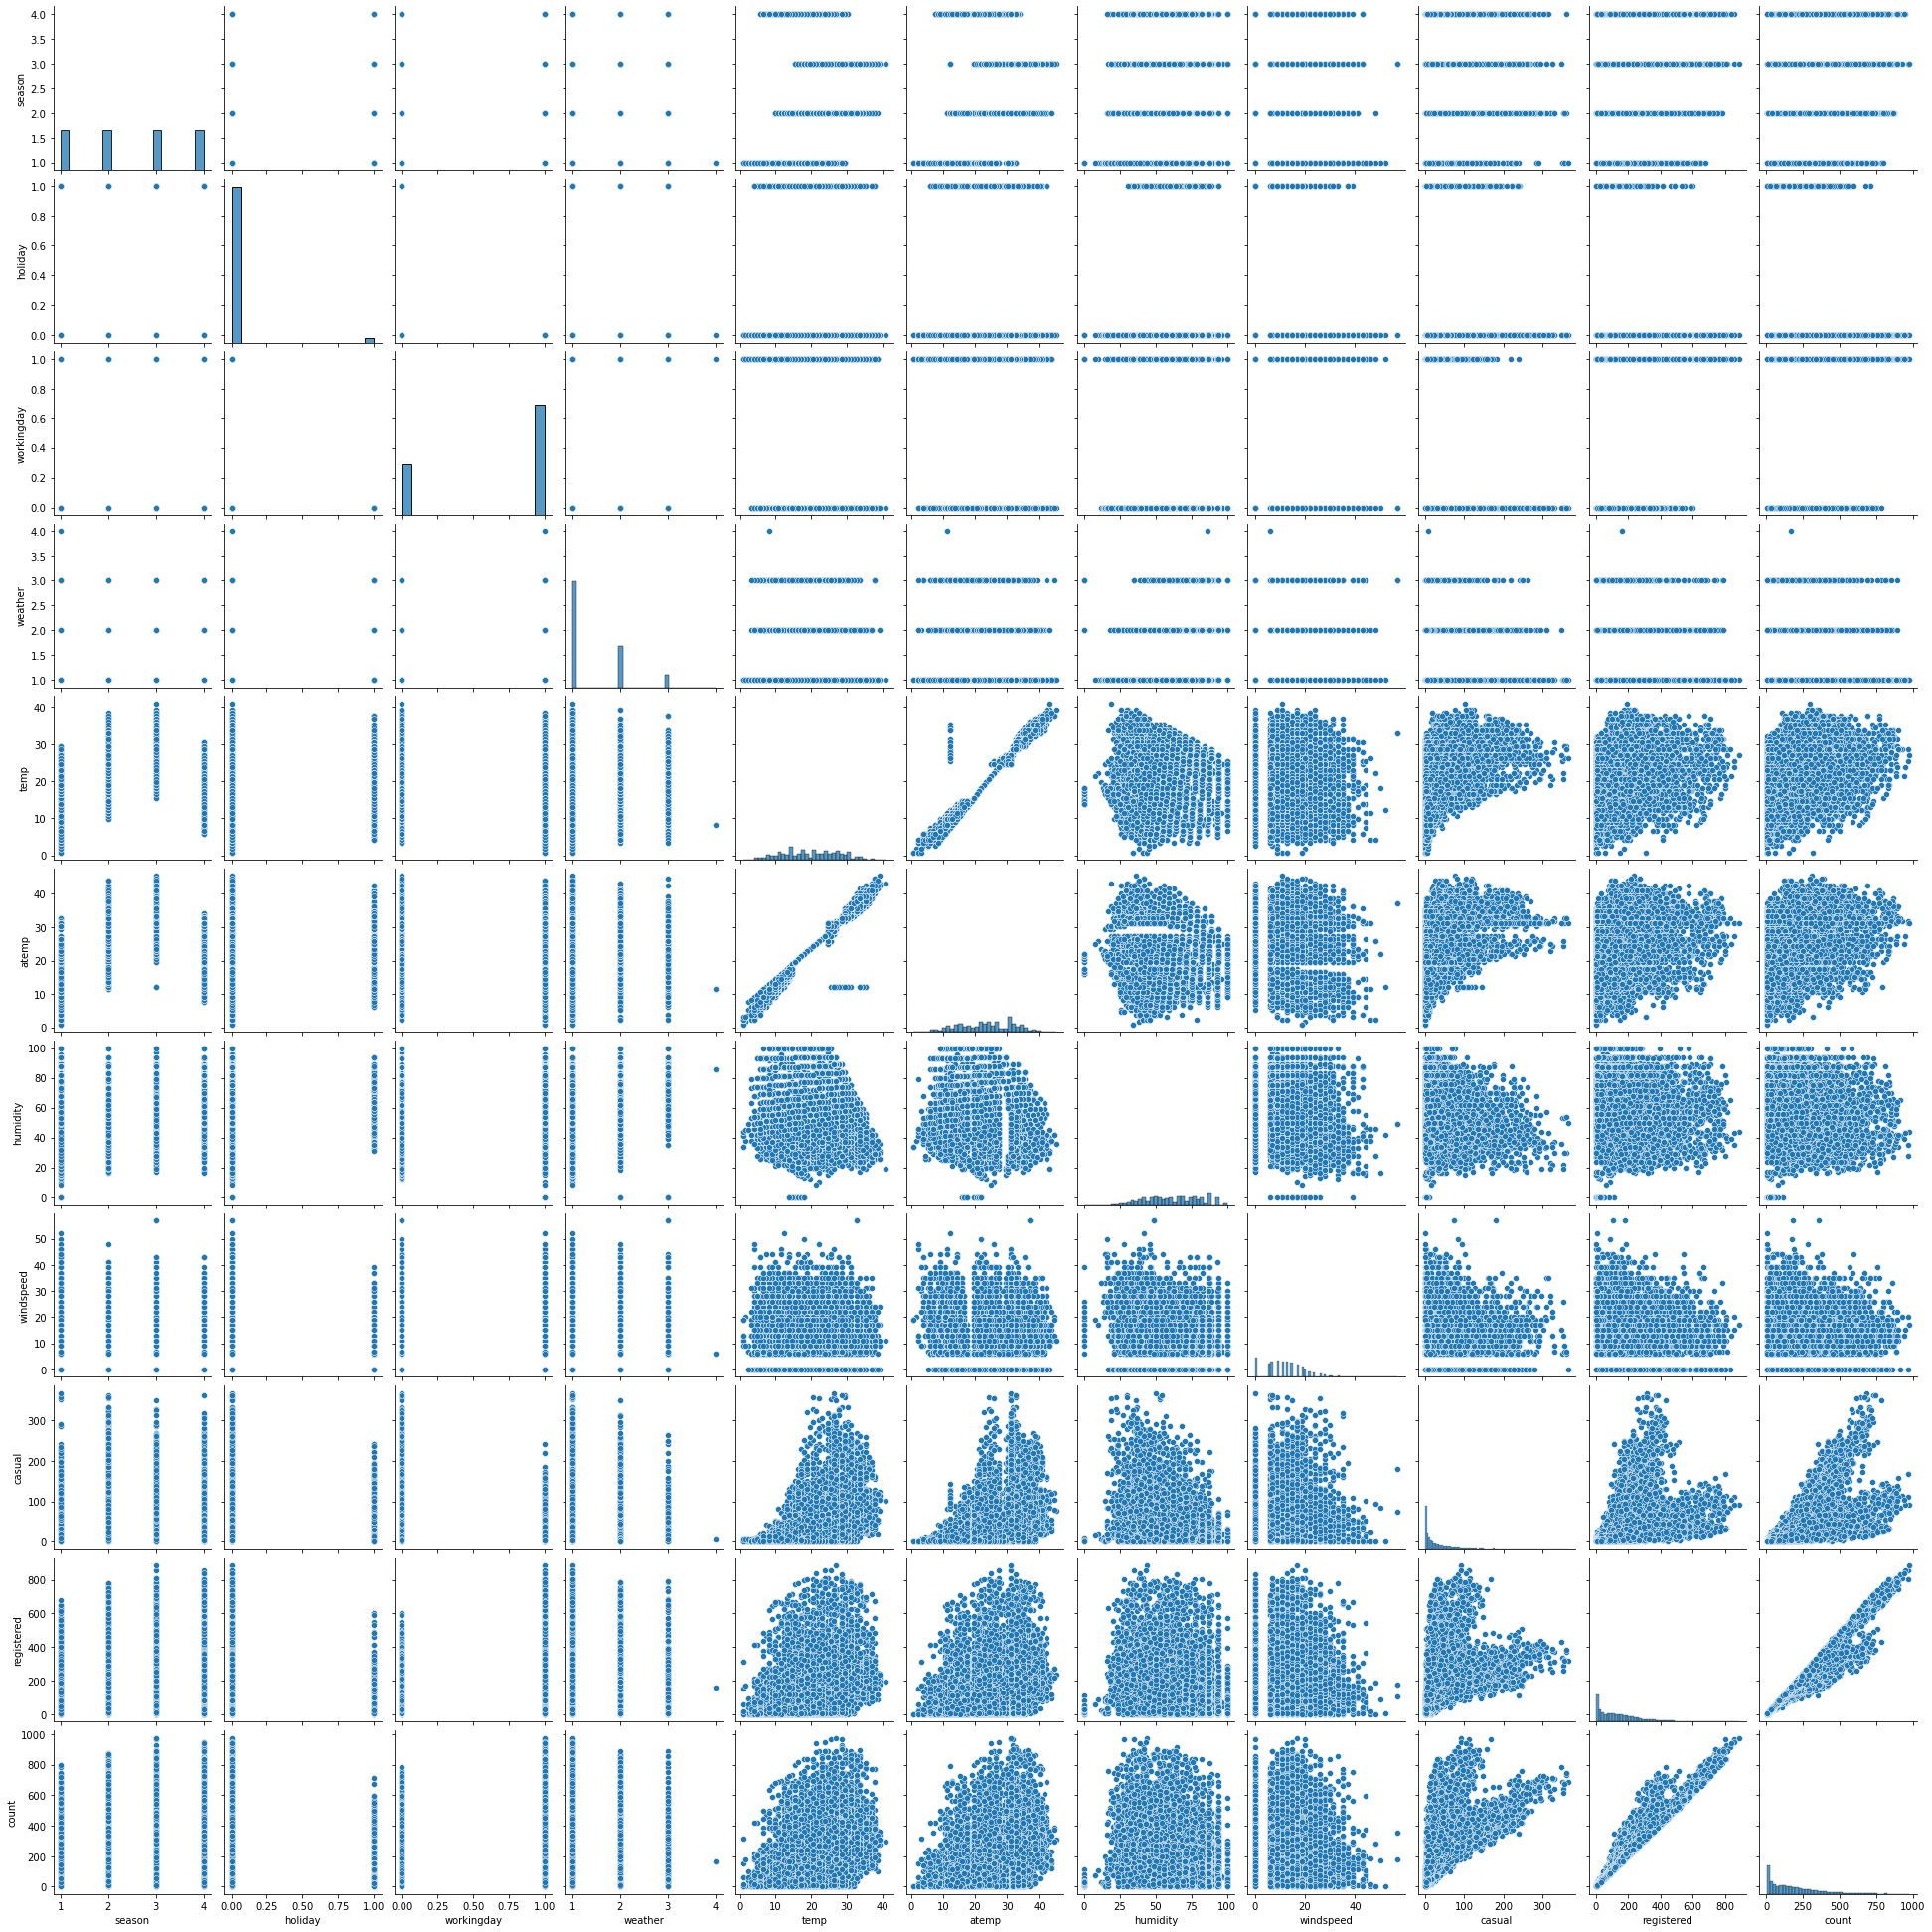

In [20]:
sns.pairplot(data=df,palette='set3')
plt.show()

- Count is hightly correlated with Casual and Registered. It's because Count is derived from Casual and Registered. We'll have to omit these variables. Temp and atemp are highly correlated.

In [97]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

## Find outliers in the numerical variables

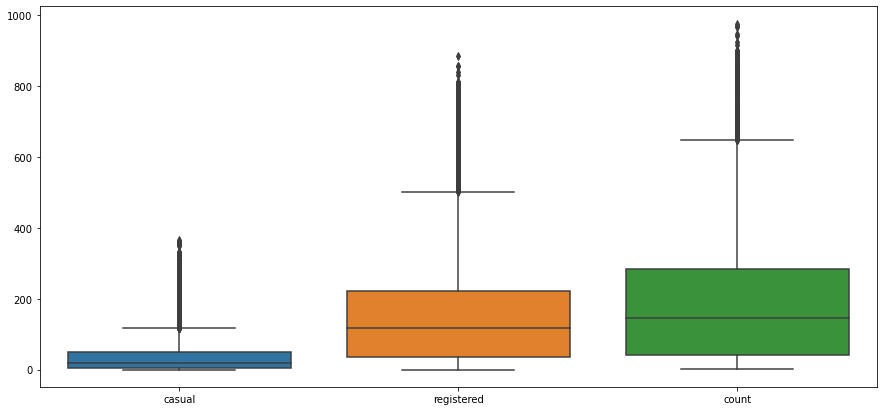

In [100]:
plt.figure(figsize=(15,7))
attrs=['casual','registered','count']
sns.boxplot(data=df[['casual','registered','count']])
plt.show()

In [38]:
da=df.copy()
attrs=['casual','registered','count']
for i in attrs:
 q1=df[i].quantile(.25)
 q3=df[i].quantile(.75)
 iqr=q3-q1
 lower=q1-(1.5*iqr)
 upper=q3+(1.5*iqr)
 print('lower limit of',i,'=',lower)
 print('upper limit of',i,'=',upper)
 print('----------------------------------------------------------------')
 da=da[~((da[i]<lower)|(da[i]>upper))]
da


lower limit of casual = -63.5
upper limit of casual = 116.5
----------------------------------------------------------------
lower limit of registered = -243.0
upper limit of registered = 501.0
----------------------------------------------------------------
lower limit of count = -321.0
upper limit of count = 647.0
----------------------------------------------------------------


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


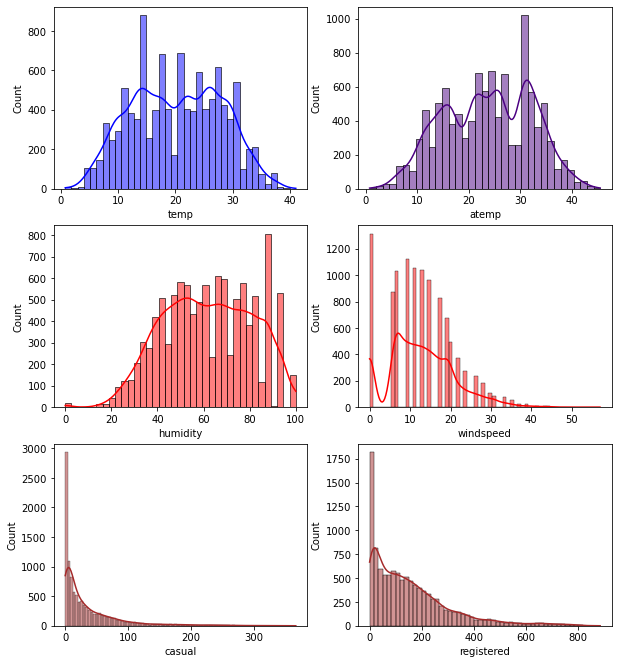

In [39]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="temp", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="atemp", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=df, x="humidity", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="windspeed", kde=True,color="red", ax=axis[1,1])
sns.histplot(data=df, x="casual", kde=True,color="brown", ax=axis[2,0])
sns.histplot(data=df, x="registered", kde=True,color="brown", ax=axis[2,1])
plt.show()


#### From the above observations we can say that :-
- Most of the values in temprature lies in range of 10 - 40.
- Most of the values in atemp lies in range of 5 - 35.
- Most of the values in humidity percentage lies in 30 -100
- Most of the values in windspeed lies in range of 5 - 30.
- Most of the values in casual users lies in 0 - 100
- Most of the values in registered users lies in range of 0 - 400.

## No of holidays without saturdays and sundays

In [41]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:>

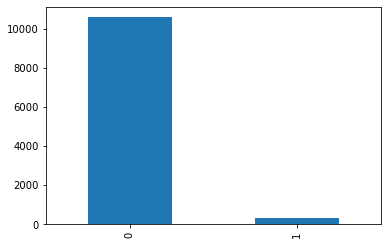

In [42]:
df.holiday.value_counts().plot(kind='bar')

- No.of holidays are only 311

## No of holidays and working days

In [43]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:>

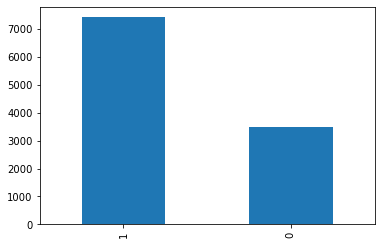

In [44]:
df.workingday.value_counts().plot(kind='bar')

- No.of holidays are almost half of working days


## Dependance of weather on total user count

In [46]:
x1=df.groupby('weather')['count'].sum().reset_index()
x1

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


In [47]:
y1=df.groupby('weather')['count'].mean().reset_index()
y1


,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


<AxesSubplot:xlabel='weather', ylabel='count'>

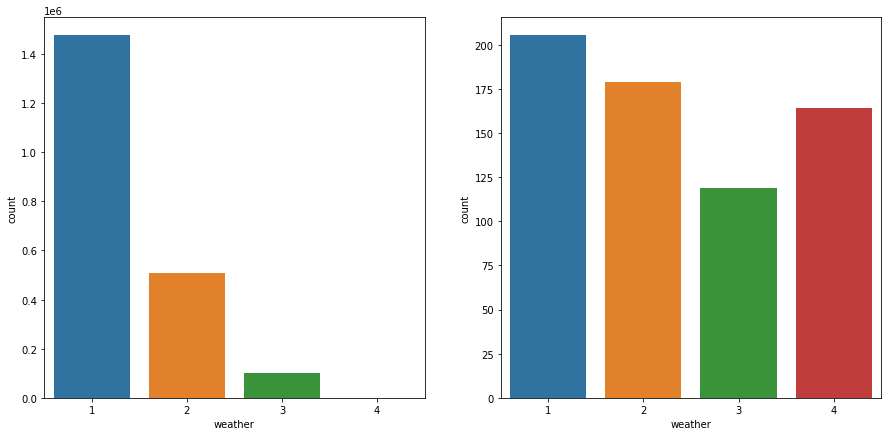

In [48]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='weather',y='count',data=x1)
plt.subplot(122)
sns.barplot(x='weather',y='count',data=y1)

## Dependance of season on totel user count

In [49]:
x1=df.groupby('season')['count'].sum().reset_index()
x1


,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [50]:
y1=df.groupby('season')['count'].mean().reset_index()
y1


,season,count
0,1,116.343261
1,2,215.251372
2,3,234.417124
3,4,198.988296


Text(0.5, 1.0, 'mean of users')

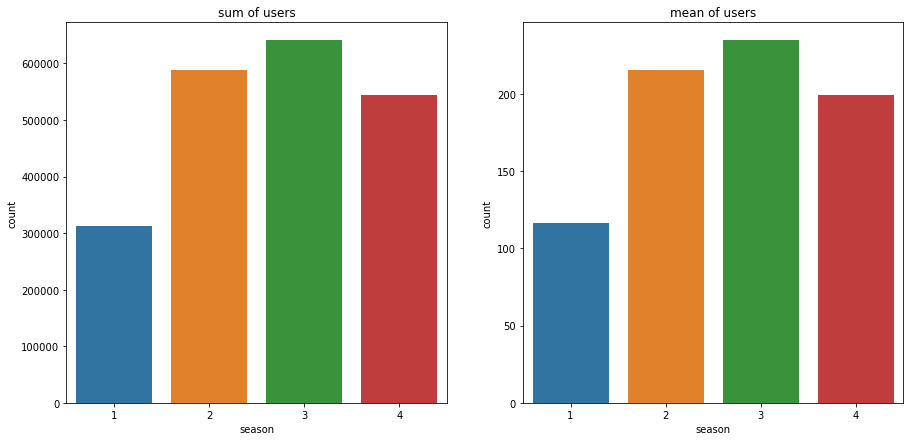

In [51]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.barplot(x='season',y='count',data=y1)
plt.title('mean of users')

- 1: Clear, Few clouds, partly cloudy, partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- No of users during season 2,3,4 is almost same, season 3 is the highest
- No of users during season 1 is the lowest

## Dependance of temp on total user count

In [52]:
x1=df.groupby('humidity')['count'].sum().reset_index()
x1


,humidity,count
0,0,623
1,8,77
2,10,107
3,12,29
4,13,17
...,...,...
84,93,14586
85,94,28666
86,96,71
87,97,64


In [54]:
y1=df.groupby('humidity')['count'].mean().reset_index()
y1


,humidity,count
0,0,28.318182
1,8,77.000000
2,10,107.000000
3,12,29.000000
4,13,17.000000
...,...,...
84,93,71.151220
85,94,88.475309
86,96,71.000000
87,97,64.000000


Text(0.5, 1.0, 'mean of users')

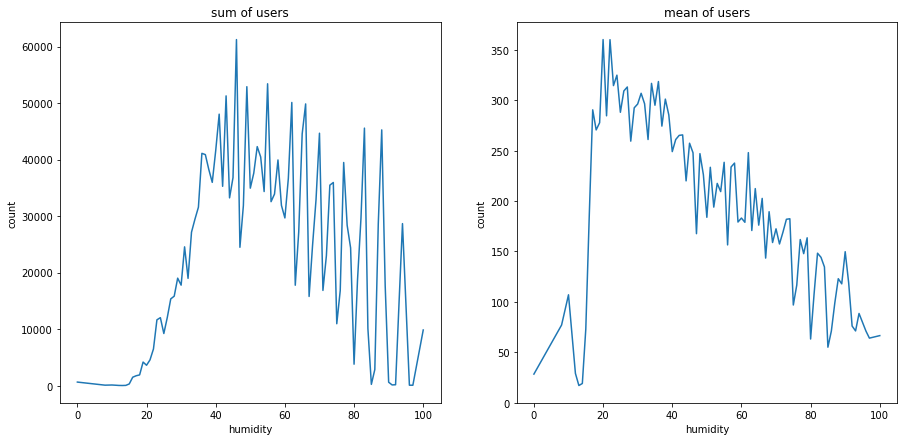

In [55]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='humidity',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='humidity',y='count',data=y1)
plt.title('mean of users')


- From the above plot we can see that at lower and higher humidity no.of users are very low
- most of the users are in the humidity range of 30 to 50
- Higher mean count of the users are in the humidity range of 20 to 40
- There is a gradual decrese of no of users with increse in humidity

## Dependance of windspeed on total user count

In [56]:
x1=df.groupby('windspeed')['count'].sum().reset_index()
x1


,windspeed,count
0,0.0000,211526
1,6.0032,128938
2,7.0015,175627
3,8.9981,196723
4,11.0014,213791
5,12.9980,210744
6,15.0013,202611
7,16.9979,177034
8,19.0012,147403
9,19.9995,110816


In [57]:
y1=df.groupby('windspeed')['count'].mean().reset_index()
y1


,windspeed,count
0,0.0000,161.101295
1,6.0032,147.864679
2,7.0015,169.852031
3,8.9981,175.645536
4,11.0014,202.262062
5,12.9980,202.249520
6,15.0013,210.833507
7,16.9979,214.847087
8,19.0012,218.051775
9,19.9995,225.235772


Text(0.5, 1.0, 'mean of users')

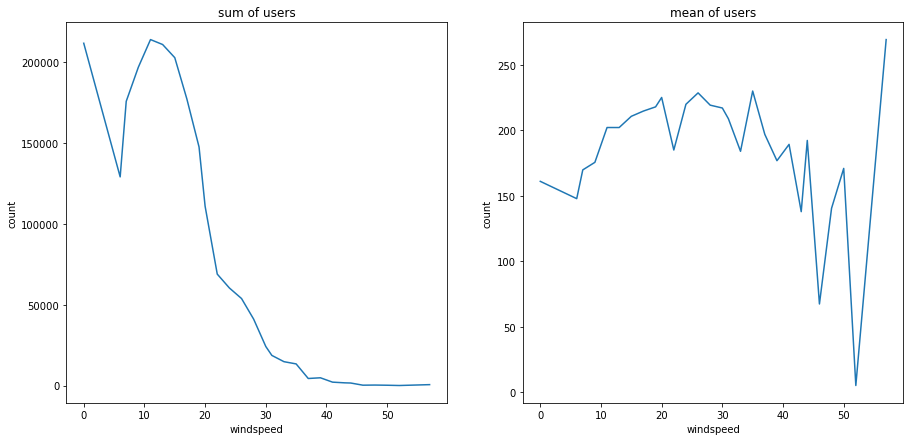

In [58]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='windspeed',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='windspeed',y='count',data=y1)
plt.title('mean of users')

- From the above plot we can see that at higher windspeed no.of users are very low
- most of the users are in the windspeed range of 0 to 25
- Mean count of the users are in the windspeed range of 0 to 40
- There is a uniform distribution of user count across all windspeed


## No of user counts in holidays without saturdays and sundays


In [59]:
df.groupby('holiday')['count'].mean()


holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

<AxesSubplot:xlabel='holiday'>

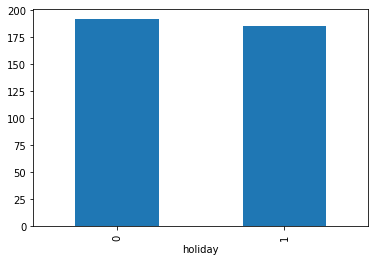

In [60]:
df.groupby('holiday')['count'].mean().plot(kind='bar')

- we can see that mean users are slightly less in holidays


## No of user counts in holidays and working days

In [61]:
df.groupby('workingday')['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

<AxesSubplot:xlabel='workingday'>

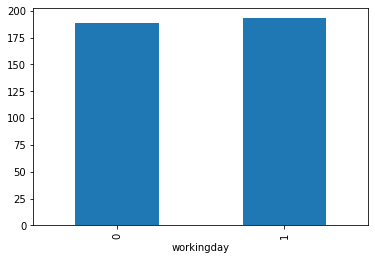

In [62]:
df.groupby('workingday')['count'].mean().plot(kind='bar')

- we can see that mean users are slightly higher in workingdays


## Adding new features like year,month,day from date time column

In [64]:
df1=df.copy()

In [155]:
df1['year'] = df1['datetime'].dt.year
df1['month'] = df1['datetime'].dt.month_name()
df1['day'] = df1['datetime'].dt.day
df1['day_name'] = df1['datetime'].dt.day_name()
df1['hour'] = df1['datetime'].dt.hour
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,year,month,day,day_name,temp_bin,atemp_bin,humidity_bin,windspeed_bin,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,16,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,40,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,32,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,13,2011,January,1,Saturday,low_temp,medium_atemp,humidity<75%,low_windspeed,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,1,2011,January,1,Saturday,low_temp,medium_atemp,humidity<75%,low_windspeed,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,336,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<50%,medium_windspeed,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,241,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,medium_windspeed,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,168,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,medium_windspeed,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,129,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,low_windspeed,22


## No of user count in each weekdays


In [66]:
x1=df1.groupby('day_name')['count'].mean().to_frame('mean').reset_index()
x1

,day_name,mean
0,Friday,197.844343
1,Monday,190.390716
2,Saturday,196.665404
3,Sunday,180.839772
4,Thursday,197.296201
5,Tuesday,189.723847
6,Wednesday,188.411348


[]

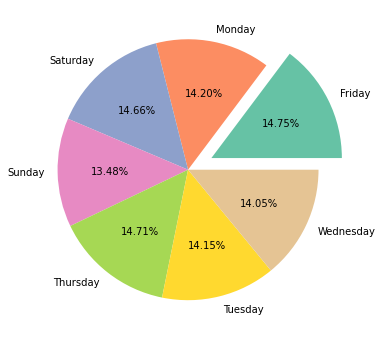

In [72]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set2')
plt.pie(data=x1, x=x1['mean'], colors=palette_color, labels=x1['day_name'], explode=(0.2,0,0,0,0,0,0), autopct="%0.2f%%")
plt.plot()


- We can see that almost every day no.of users are same
- Most and leat mean users are in respective days are friday and sunday

## No of user count in each month

In [73]:
df1.groupby('month')['count'].mean().to_frame('mean').reset_index()

,month,mean
0,April,184.160616
1,August,234.118421
2,December,175.614035
3,February,110.003330
4,January,90.366516
5,July,235.325658
6,June,242.031798
7,March,148.169811
8,May,219.459430
9,November,193.677278


 From the above barplot we can se that
- june,july and august month are the most bike using months
- January february are the least

[Text(0.5, 1.0, 'Count of bikes during different months')]

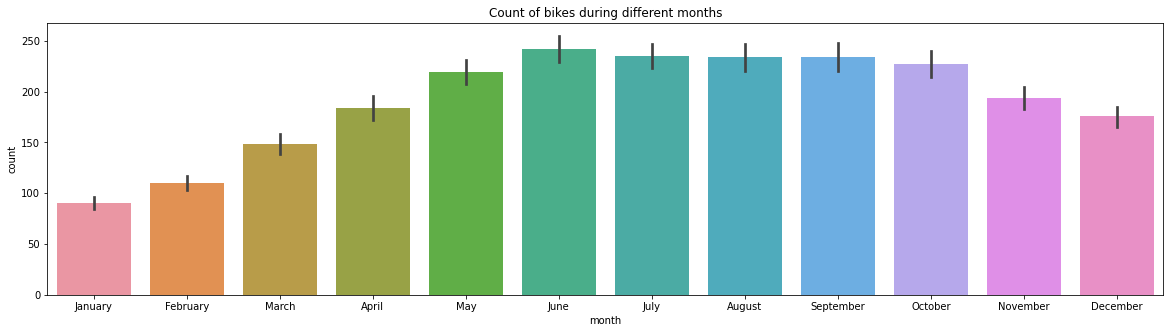

In [151]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=df1, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

- From the above less number of count in january february months and june to october have more number of counts

## No.of users across weather in working days

<AxesSubplot:xlabel='weather', ylabel='count'>

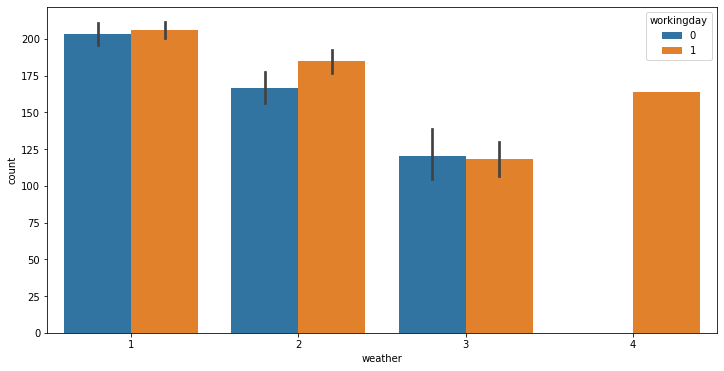

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1,y='count',x='weather',hue='workingday')

- In every weather conditions working days have most number of users


## No.of users across every season in working days

<AxesSubplot:xlabel='season', ylabel='count'>

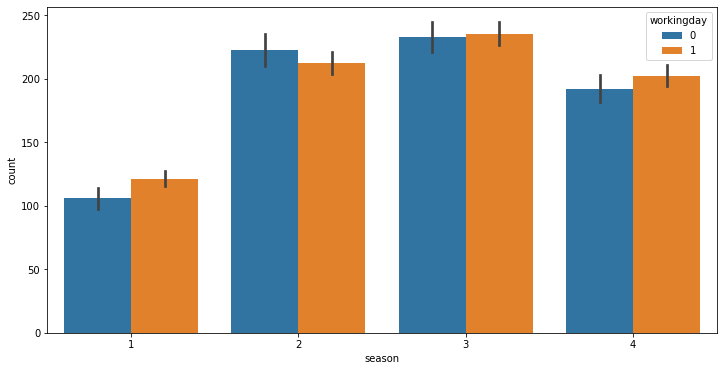

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1,y='count',x='season',hue='workingday')


- We can see that season 1,3,4 working days have most number of users
- In Season 2 holidays have most number of users


## Converting  features like temp,atemp,humidity,windspeed to bins


In [81]:
df1['temp_bin']=pd.cut(df1['temp'],bins=[-1,10,20,30,45],labels=['low_temp','medium_temp','normal_temp','high_temp'])
df1['atemp_bin']=pd.cut(df1['atemp'],bins=[-1,10,20,30,46],labels=['low_atemp','medium_atemp','normal_atemp','high_temp'])
df1['humidity_bin']=pd.cut(df1['humidity'],bins=[-1,25,50,75,101],labels=['humidity<25%','humidity<50%','humidity<75%','humidity<100%'])
df1['windspeed_bin']=pd.cut(df1['windspeed'],bins=[-1,15,30,45,60],labels=['low_windspeed','medium_windspeed','high_windspeed','very_high_windspeed'])
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,day_name,temp_bin,atemp_bin,humidity_bin,windspeed_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,January,1,Saturday,low_temp,medium_atemp,humidity<100%,low_windspeed
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,January,1,Saturday,low_temp,medium_atemp,humidity<75%,low_windspeed
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,January,1,Saturday,low_temp,medium_atemp,humidity<75%,low_windspeed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<50%,medium_windspeed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,medium_windspeed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,December,19,Wednesday,medium_temp,medium_atemp,humidity<75%,low_windspeed


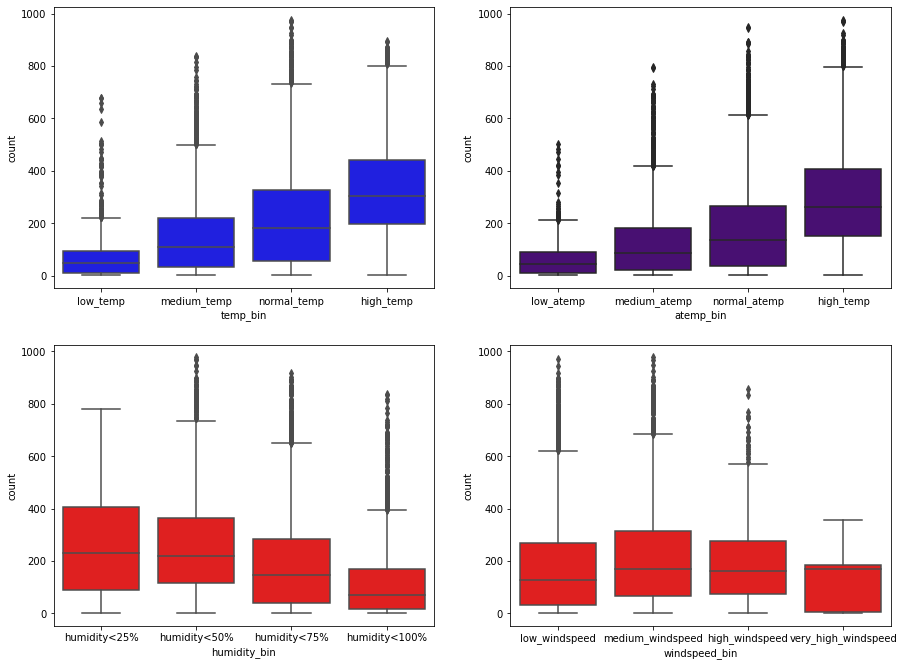

In [83]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
fig.subplots_adjust(top=1.2)
sns.boxplot(data=df1, x="temp_bin",y='count',color="blue", ax=axis[0,0])
sns.boxplot(data=df1, x="atemp_bin",y='count',color="indigo", ax=axis[0,1])
sns.boxplot(data=df1, x="humidity_bin",y='count',color="red", ax=axis[1,0])
sns.boxplot(data=df1, x="windspeed_bin",y='count',color="red", ax=axis[1,1])
plt.show()

## No.of users across every season in diffrent year

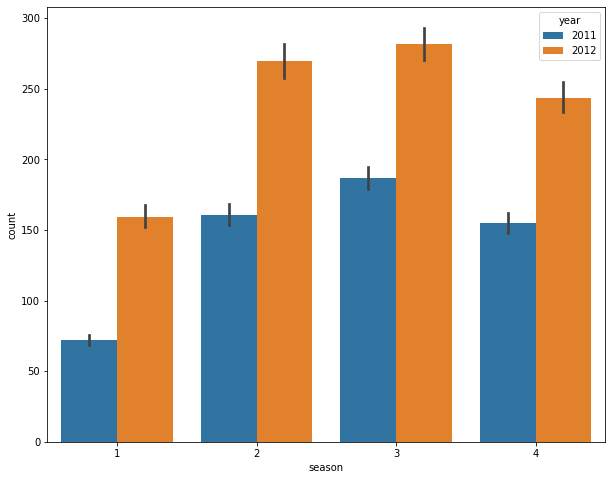

In [85]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='year',data=df1)
plt.show()

- We can see that in every season with increse in year number of users are incresing
- In season 1 almost double the users compare to previous year

## No.of users across every season in casual and registered users

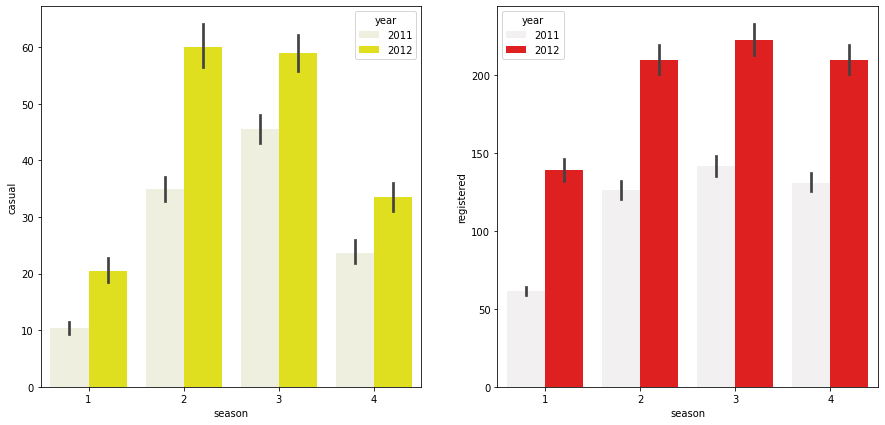

In [86]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(x='season',y='casual',hue='year',data=df1,color='yellow')
plt.subplot(122)
sns.barplot(x='season',y='registered',hue='year',data=df1,color='red')
plt.show()

- Both registerd and casual users are increse with increse in year in every seasons

## Temprature varies across diffrent month in each season

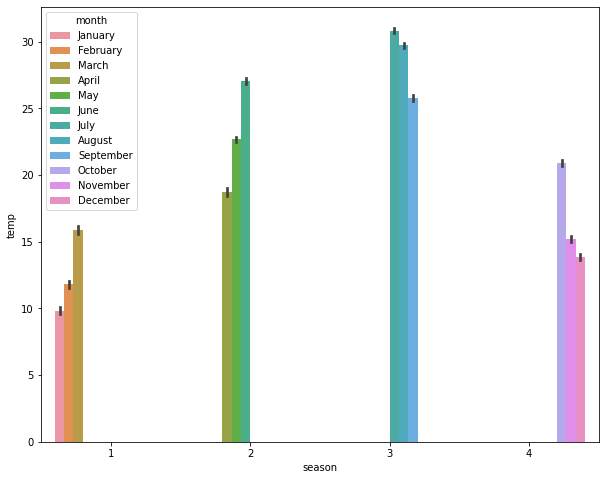

In [87]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='temp',hue='month',data=df1)
plt.show()


- Season 3 is the highest temprature seasons
  - june july August
- season 1 is the lowest temprature seasons
  - january february March

# No.of users varies across diffrent month in each season

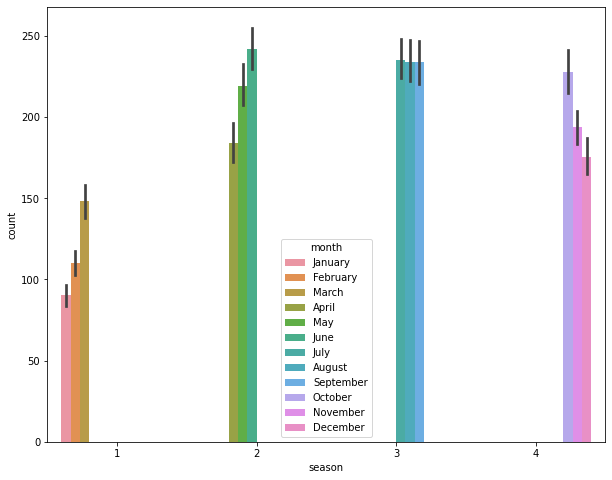

In [88]:
plt.figure(figsize=(10,8))
sns.barplot(x='season',y='count',hue='month',data=df1)
plt.show()

- Season 2,3,4 is the highest bike user count seasons
- Season 1 is the lowest bike user count seasons
     - january february March

## Relationship between temperature and humidity with wsers

[Text(0.5, 1.0, 'Relation between humidity and users')]

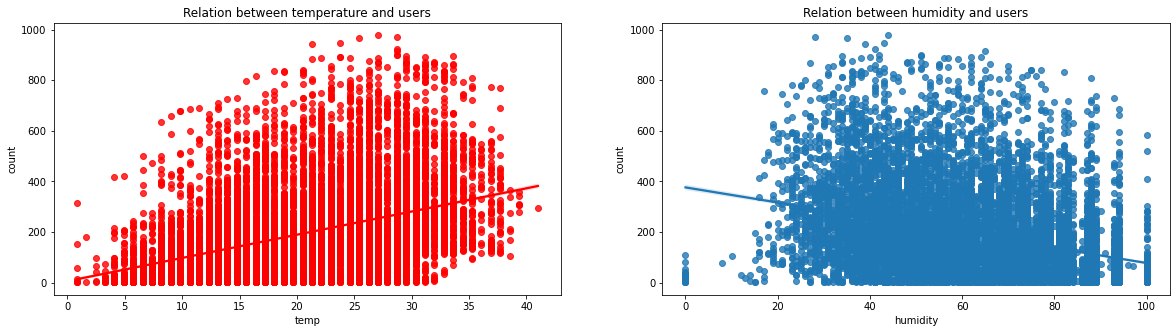

In [94]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1 ,color='red')
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

- The above Red colour plot shows the relationship between temperature and users.
- and the blue color plot shows the relationship between humidity and users.

## Analysis based on working hours on holidays

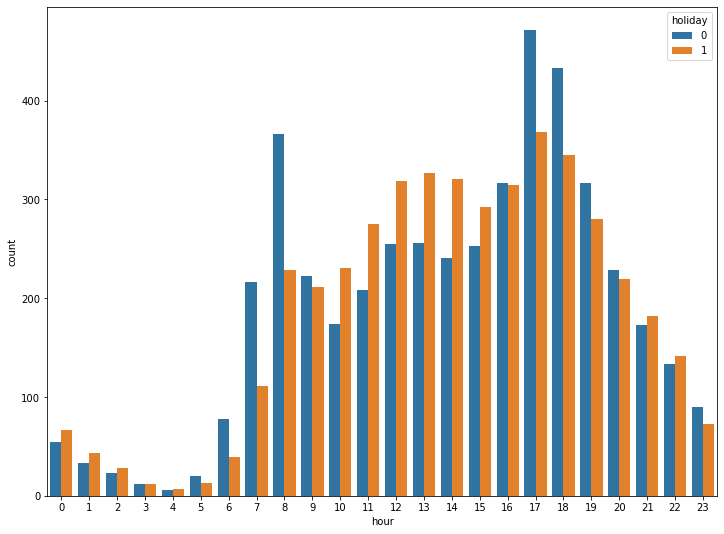

In [156]:
plt.figure(figsize=(12,9))
holidays = df.groupby(['hour', 'holiday'])['count'].mean().reset_index()
sns.barplot(data=holidays, x='hour', y='count', hue='holiday')
plt.show()


## Analysis based on working hours on different days

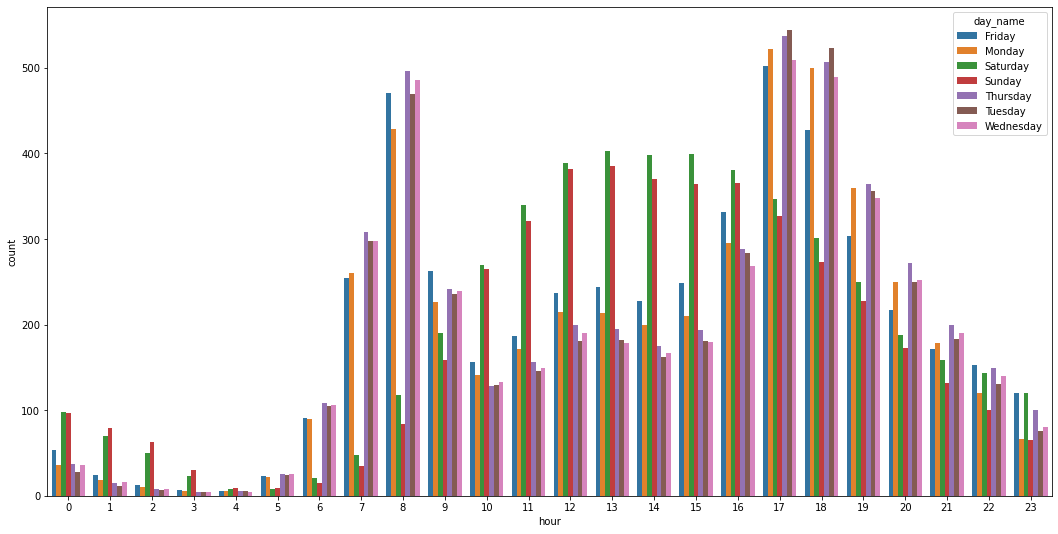

In [180]:
plt.figure(figsize=(18,9))
weekly = df1.groupby(['hour', 'day_name'])['count'].mean().reset_index()
sns.barplot(data=weekly, x='hour', y='count', hue='day_name')
plt.show()

 From the above we can see,
- morning 7AM -9AM amd evening 16PM -19PM have more number of users
- morning 0-6AM only less amount of users

## Analysis based on Workingday hours

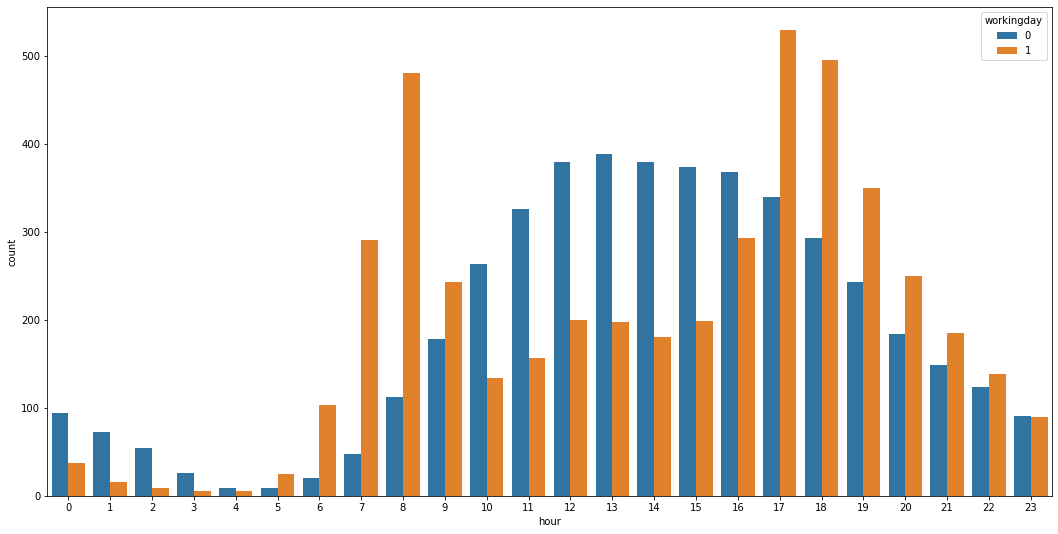

In [157]:
plt.figure(figsize=(18,9))
weekend = df1.groupby(['hour', 'workingday'])['count'].mean().reset_index()
sns.barplot(data=weekend, x='hour', y='count', hue='workingday')
plt.show()

- From the above till 7AM having less number of users

## Analysis based on temperature and feeling temperature

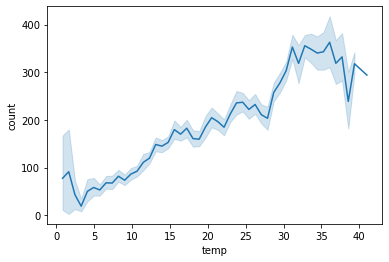

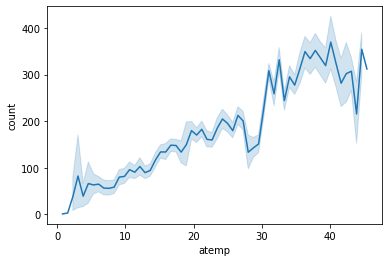

In [162]:
temp = df.groupby(['hour', 'temp'])['count'].mean().reset_index()
sns.lineplot(data=df1, x='temp', y='count')
plt.show()
temp = df.groupby(['hour', 'atemp'])['count'].mean().reset_index()
sns.lineplot(data=df1, x='atemp', y='count')
plt.show()

## Relationship between monthly count of holidays 

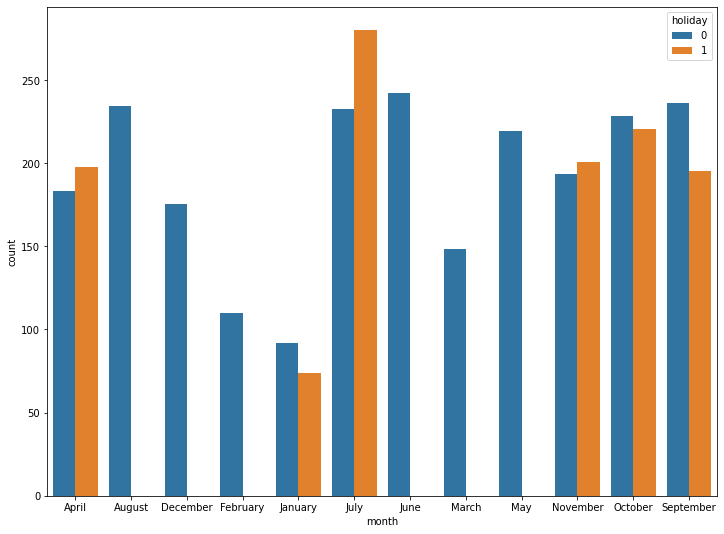

In [160]:
plt.figure(figsize=(12,9))
holidays = df1.groupby(['month', 'holiday'])['count'].mean().reset_index()
sns.barplot(data=holidays, x='month', y='count', hue='holiday')
plt.show()

## Relationship between monthly count of workingdays

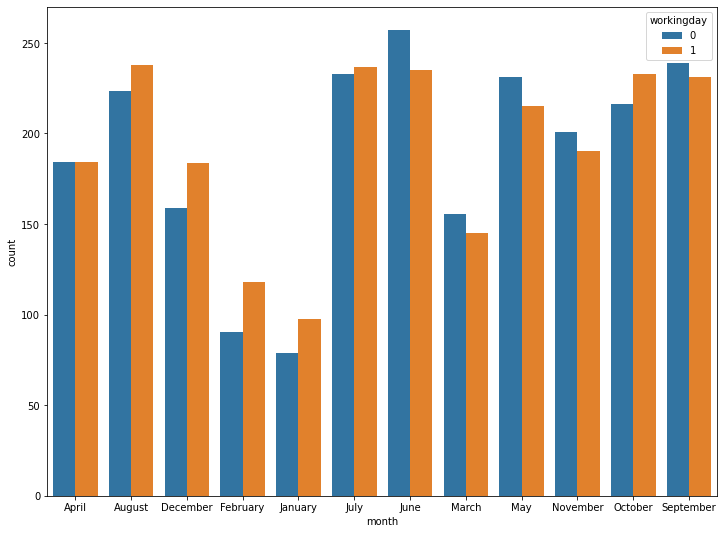

In [161]:
plt.figure(figsize=(12,9))
holidays = df1.groupby(['month', 'workingday'])['count'].mean().reset_index()
sns.barplot(data=holidays, x='month', y='count', hue='workingday')
plt.show()

- From the above january and february having the less amount of count during working days

# No of user count for each temperature

In [166]:
ds=df.groupby('temp')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
ds

,temp,count
0,36.08,362.869565
1,32.80,355.623762
2,31.16,352.801653
3,33.62,348.323077
4,35.26,342.934211
5,34.44,340.225000
6,37.72,332.176471
7,36.90,318.717391
8,31.98,318.683673
9,39.36,317.833333


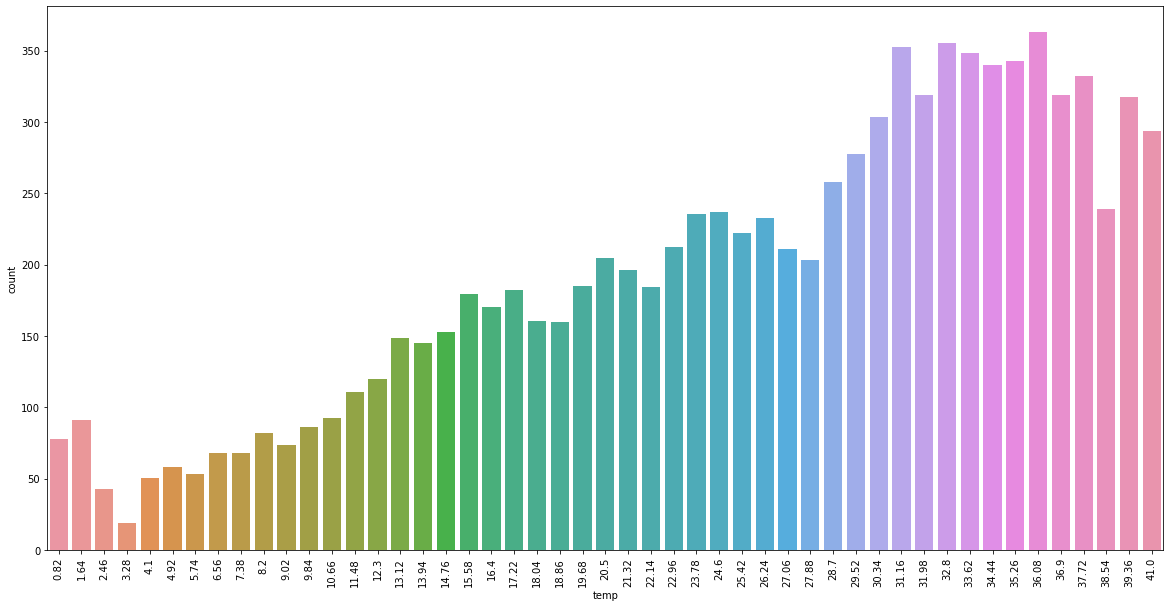

In [167]:
plt.figure(figsize=(20,10))
sns.barplot(x='temp',y='count',data=ds)
plt.xticks(rotation=90)
plt.show()

- More users prefer the temperature 36.08
- The lowest number users comes for bikes is in the temperature 3.28


## No of user count for each atemp


In [170]:
s=df.groupby('atemp')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
s 

,atemp,count
0,40.150,369.577778
1,44.695,354.333333
2,37.880,351.835052
3,36.365,349.243902
4,38.635,335.783784
5,37.120,334.144068
6,32.575,331.746324
7,40.910,324.512821
8,39.395,319.194030
9,35.605,312.144654


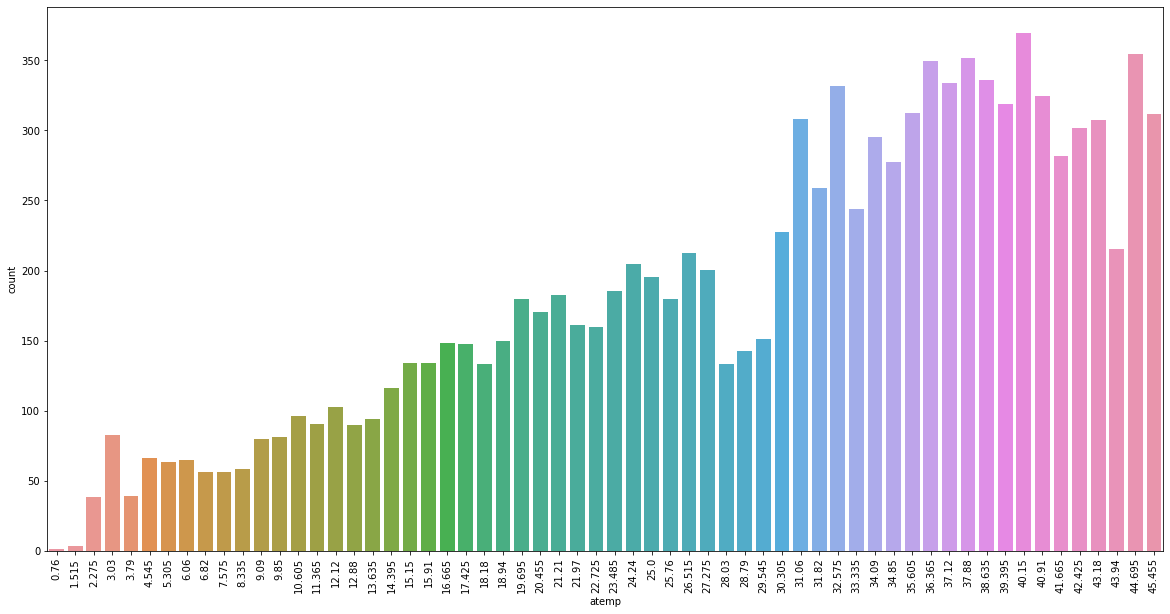

In [171]:
plt.figure(figsize=(20,10))
sns.barplot(x='atemp',y='count',data=s)
plt.xticks(rotation=90)
plt.show()

- More people use bikes when they feel 40.15 temperature.

## No of user count for each humidity level

In [173]:
dh=df.groupby('humidity')['count'].mean().sort_values(ascending=False).to_frame().reset_index()
dh 

,humidity,count
0,20,360.200000
1,22,360.111111
2,24,324.891892
3,36,318.581395
4,34,316.741935
...,...,...
84,85,55.000000
85,12,29.000000
86,0,28.318182
87,14,19.000000


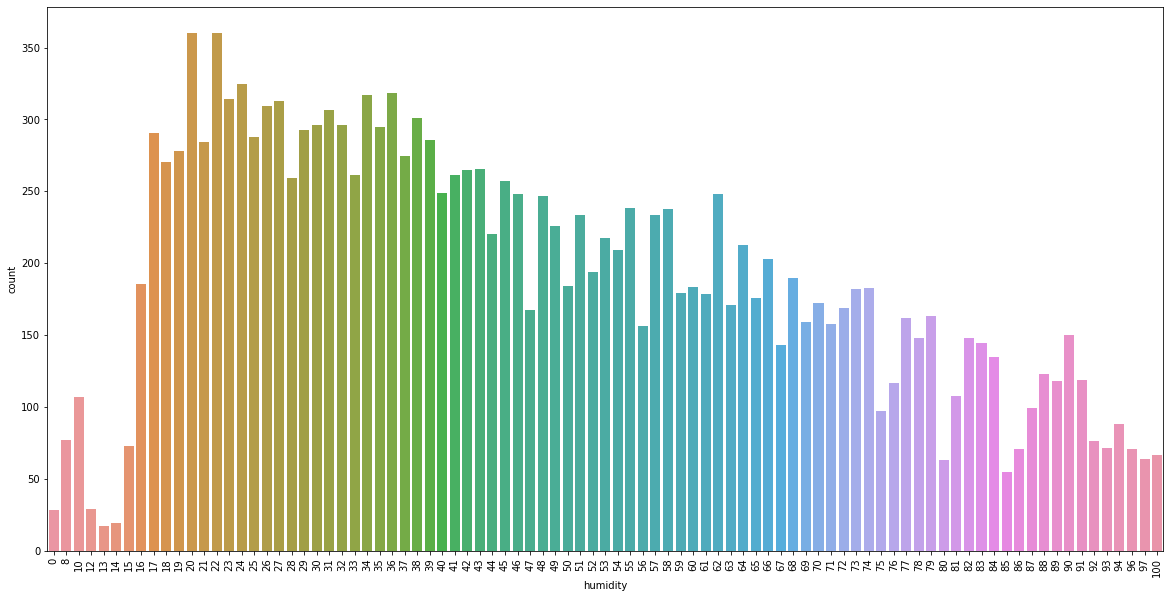

In [174]:
plt.figure(figsize=(20,10))
sns.barplot(x='humidity',y='count',data=dh)
plt.xticks(rotation=90)
plt.show()

- More people use bikes when the humidity level is in between the range 17-40

## No of user count for each windspeed level

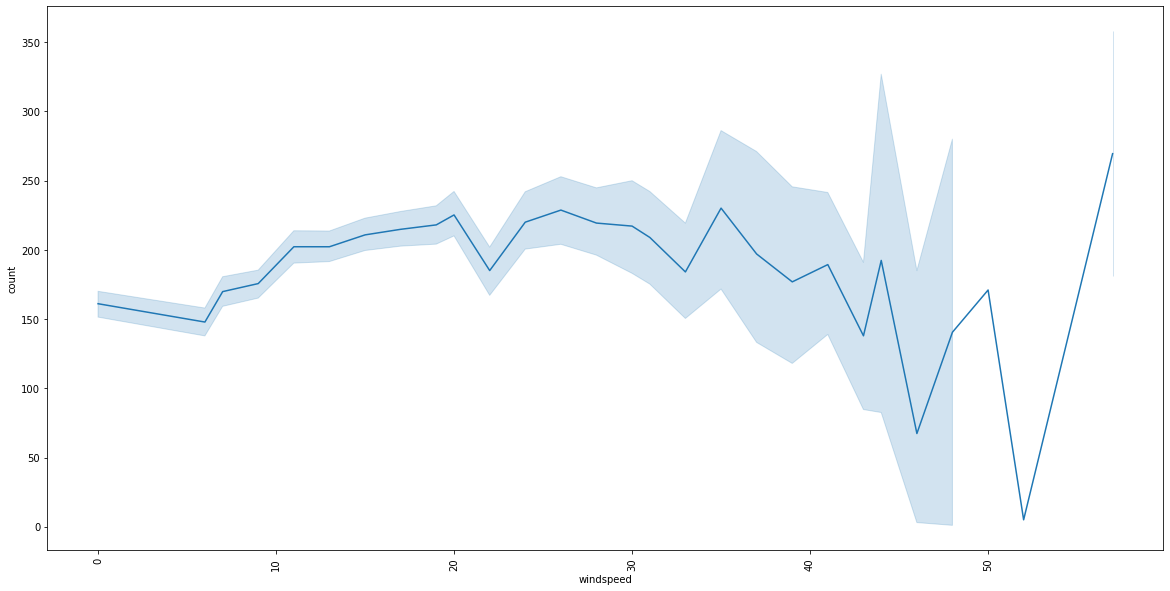

In [175]:
plt.figure(figsize=(20,10))
sns.lineplot(x='windspeed',y='count',data=df)
plt.xticks(rotation=90)
plt.show()


- More people prefer wind speed is greater than 50

## Chi-square test to check if Weather is dependent on the season


In [23]:
#H0:Weather is Independent on season
#H1:Weather is dependent on season
df_ws = pd.crosstab(df.weather,df.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [24]:
# Above weather 4 has less expected count so not include 4 
df_w=df[-(df['weather']==4)]

In [25]:
df_ws = pd.crosstab(df_w.weather,df_w.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [26]:
stat, p_value, dof, expected = stats.chi2_contingency(df_ws)
stat, p_value, dof, expected

(46.10145731073249,
 6.664576536706683e-06,
 12,
 array([[ 1774.04869086,  1805.76352779,  1805.76352779,  1806.42425356,
          7192.        ],
        [  699.06201194,   711.55920992,   711.55920992,   711.81956821,
          2834.        ],
        [  211.8892972 ,   215.67726229,   215.67726229,   215.75617823,
           859.        ],
        [ 2685.        ,  2733.        ,  2733.        ,  2734.        ,
         10885.        ]]))

In [27]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Weather is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Weather is dependent on season ')

We reject the Null Hypothesis : Weather is dependent on season 


- p- value (6.664576536706683e-06) < alpha(0.05) so we can reject H0 Which means weather and seasons have a significant dependency and Both weather and seasons are not independent of each other
- We can conclude that we can reject the H0 as we have enough evidence to reject the null hypothesis, so it seems like weather and Seasons are dependent on each other.

## Chi-square test to check if Weather is workingday on the season

In [28]:
#H0 = workingday is Independent on season
#H1 = workingday is dependent on season
df_count_season = pd.crosstab(df.workingday,df.season,margins=True,margins_name='Total')
df_count_season

season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [29]:
stat, p_value, dof, expected = stats.chi2_contingency(df_count_season)
stat, p_value, dof, expected

(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,   872.16994305,   872.16994305,   872.48906853,
          3474.        ],
        [ 1828.82895462,  1860.83005695,  1860.83005695,  1861.51093147,
          7412.        ],
        [ 2686.        ,  2733.        ,  2733.        ,  2734.        ,
         10886.        ]]))

In [30]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Workingday is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season  


- p- value (0.9583429307736173) > alpha(0.05) so we can Accept H0 Which means workingday and seasons not have a significant dependency and Both workingday and seasons are independent of each other
- We can conclude that we can accept the H0 as we have enough evidence to accept the null hypothesis, so it seems like workingday and Seasons are Independent on each other.

## ANOVA to check if No. of cycles rented is similar or different in different season

In [89]:
#H0 : count of bikes  is similar across various season
#H1 : count of bikes is different across various season
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']

In [32]:
p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
print("P-Value : ",p_value)

P-Value :  F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)


In [33]:
alpha = 0.05
if p_value[1] >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various season ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various season ')

We reject the Null Hypothesis : count of bikes is different across various season 


- As the p value < alpha(0.05) , we reject H0 and thus we can conclude that count of bikes differs with a change in season.

## ANOVA to check if No. of cycles rented is similar or different in different weather

In [91]:
#H0 : count of bikes  is similar across various weather
#H1 : count of bikes is different across various weather
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']

In [35]:
p_value = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print("P-Value : ",p_value)

P-Value :  F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)


In [36]:
alpha = 0.05
if p_value[1] >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes  is similar across various weather ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various weather ')

We reject the Null Hypothesis : count of bikes is different across various weather 


- As the p value < alpha(0.05) , we reject H0 and thus we can conclude that count of bikes differs with a change in weather.

# Recommendations
- Months like January, February and march sees less amount of booking to increase it we can provide a discount on the booking to attract more customres.
- Most demand in evening time (16PM-19PM). so in this time period more number of cycle should be provided.
- More users are booking the bike when humidity is less so we can provide offer to add a refreshement during humid weather.
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- Working days sees more booking so we can provide an offer during weekends or holidays to bring in more bookings.
- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
- Morning 0- 6AM less amount of users so we can provide offers during that time.